# 단순 선형 회귀

# < 사이킷런에서 최소제곱법으로 단순 선형회귀 수행 >

### 필요한 모듈 import

In [2]:
import pandas as pd

# 1. 맥주 데이터를 활용한 단순 선형 회귀 실습

### 데이터 수집

In [3]:
import os

print(os.getcwd())

c:\develop_dir\deep_and_machine_learning\210~220


In [4]:
beer = pd.read_csv('./data/beer.csv')
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


### 데이터 탐색

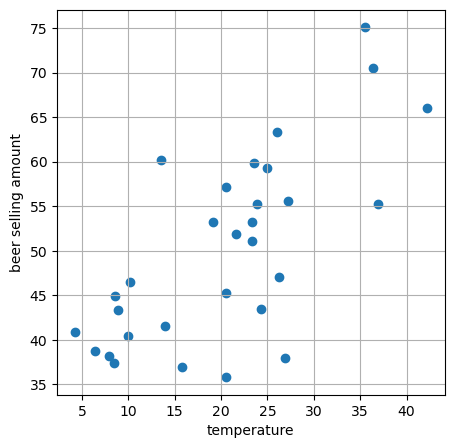

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(beer.temperature, beer.beer)
plt.xlabel("temperature")
plt.ylabel("beer selling amount")
plt.grid()

In [6]:
# 독립 변수, 종속 변수 확인
beer.temperature

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

In [7]:
# 종속 변수 확인, 레코드 수 확인
beer.beer

0     45.3
1     59.3
2     40.4
3     38.0
4     37.0
5     40.9
6     60.2
7     63.3
8     51.1
9     44.9
10    47.0
11    53.2
12    43.5
13    53.2
14    37.4
15    59.9
16    41.5
17    75.1
18    55.6
19    57.2
20    46.5
21    35.8
22    51.9
23    38.2
24    66.0
25    55.3
26    55.3
27    43.3
28    70.5
29    38.8
Name: beer, dtype: float64

In [8]:
len(beer)

30

###  데이터 준비 - 학습용 / 검증용 데이터 분리

In [9]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리


# 독립변수, 종속변수 데이터셋 준비
import numpy as np

X = np.array(beer.temperature).reshape((-1, 1)) # 이 처리 과정, 중요하다.
# X = beer.temperature.reshape(-1, 1)
y= np.array(beer.beer)

In [10]:
# 학습용, 검증용 데이터셋 준비
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
len(X_train), len(X_test), len(y_train), len(y_test)

(24, 6, 24, 6)

### 모델 구축

In [12]:
#모델 클래스 선택 후 인스턴스 객체 생성
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [13]:
# 학습 수행
reg = lr.fit(X_train, y_train) # 데이터를 넣어서 맞는 계수를 구하는, 학습을 수행한다.

In [14]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
w1 = reg.coef_[0] 
w0 = reg.intercept_

In [15]:
#회귀식
print(f'y= {w1:.2f}x + {w0:.5f}')

y= 0.70x + 36.06667


In [16]:
# 구축된 모델에서 예측 수행
y_pred = reg.predict(X_test)
y_pred

array([60.81217046, 50.35632326, 54.32954519, 50.35632326, 41.92193985,
       43.17664151])

In [17]:
y_test # 실제값과 차이를 확인

array([75.1, 35.8, 47. , 57.2, 37.4, 46.5])

### 모델 성능 평가

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#MSE
mse = mean_squared_error(y_test, y_pred)
#RMSE
rmse = np.sqrt(mse)

In [19]:
#결정계수 R2
r2score = r2_score(y_test, y_pred)

In [20]:
print(mse, rmse, r2score)

91.34656925529704 9.557539916489862 0.48456481297951504


### 시각화

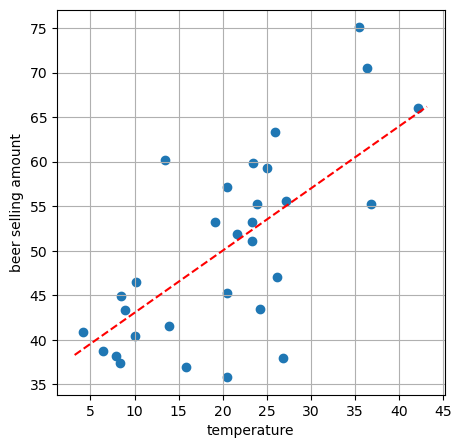

In [21]:
plt.figure(figsize=(5, 5))

#y = 0.697056X + 36.06 시각화
plt.scatter(beer.temperature, beer.beer)
plt.grid()
# 수집한 데이터셋 시각화
xx = np.arange(beer.temperature.min() - 1,\
    beer.temperature.max() + 2)
yy = reg.predict(xx.reshape((-1, 1))) # 2차원 배열로 reshape! 잘 기억하세요
plt.plot(xx, yy, linestyle='--', color='red')
plt.xlabel('temperature')
plt.ylabel('beer selling amount');

# 응용1. 나이, 키의 관계를 회귀 분석

In [22]:
# 필요한 모듈 import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 데이터 생성/수집

In [23]:
age_and_height = pd.read_csv('data/age_height.csv')
age_and_height['age(X)']

0     15.425550
1     23.008112
2      5.002859
3     12.558314
4      8.668897
5      7.308465
6      9.656505
7     13.639018
8     14.919187
9     18.470418
10    15.479863
11    22.130488
12    10.111306
13    26.952936
14     5.684690
15    21.761688
Name: age(X), dtype: float64

#### 데이터 탐색

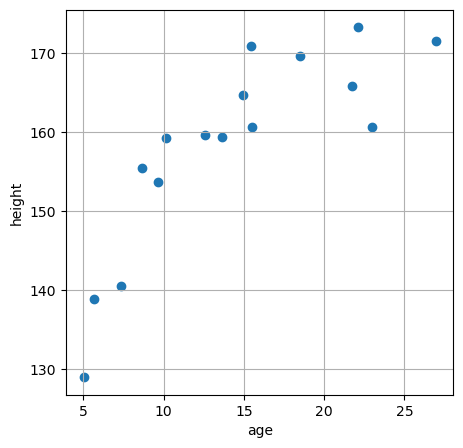

In [24]:
# 데이터 분포 시각화
plt.figure(figsize=(5, 5))
plt.scatter(age_and_height['age(X)'], age_and_height['height(T)'])
plt.xlabel('age')
plt.ylabel('height')
plt.grid()

In [25]:
len(age_and_height)

16

#### 데이터 준비 - 학습용 / 검증용 데이터 분리

In [26]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
x = np.array(age_and_height['age(X)']).reshape((-1, 1))
y = np.array(age_and_height['height(T)'])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(12, 4, 12, 4)

In [28]:
##### 모델 구축 및 예측

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
reg = lr.fit(X_train, y_train)
w1 = reg.coef_[0]
w0 = reg.intercept_

In [29]:
#모델 객체 생성  및 학습

# 예측 수행
y_pred = reg.predict(X_test)



In [30]:
##### 모델 성능 평가

#MSE : metrcics 모듈의 mean_squared_error() 함수 사용
#RMSE : numpy의 sqrt() 함수 사용
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# MSE
mse = mean_squared_error(y_test, y_pred)
#RMSE
rmse = np.sqrt(mse)

#결정계수 R2
r2score = r2_score(y_test, y_pred)
print(mse, rmse, r2score)

#회귀식
print(f'y = {w1:.5f}x + {w0:.5f}')

83.49484660286443 9.137551455552217 0.6627884107222466
y = 1.43863x + 138.78419


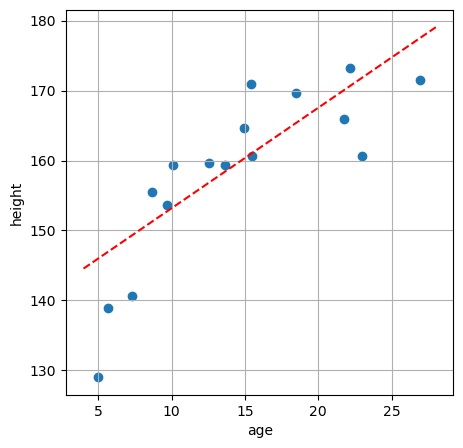

In [31]:
#나이, 키 데이터 실제 데이터 및 회귀식 시각화
plt.figure(figsize=(5, 5))
plt.scatter(age_and_height['age(X)'], age_and_height['height(T)'])
plt.grid()

#y = 0.697056X + 36.06 시각화
xx = np.arange(min(age_and_height['age(X)']) - 1, max(age_and_height['age(X)']) + 2)
yy = reg.predict(xx.reshape((-1, 1)))
plt.plot(xx, yy, linestyle='--', color='red')
plt.xlabel("age")
plt.ylabel("height");

# < 스탯츠모델에서 단순선형회귀 수행>

In [32]:
# 스탯츠모델 import
import statsmodels.api as sm

# 맥주 데이터 
beer = pd.read_csv('./data/beer.csv')

import numpy as np

# 데이터 생성


# 독립변수, 종속변수 데이터셋 준비
X = np.array(beer['temperature']).reshape(-1, 1)
y = beer['beer']

#전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train = sm.add_constant(X_train) # 상수항 결합으로 독립변수에 데이터를 추가

In [35]:
# 스탯츠모델
lr = sm.OLS(y_train, X_train) # 학습용 데이터를 객체 생성 시 전달

In [36]:
# 모델 객체에 대한 학습 수행
reg = lr.fit() # 학습용 데이터를 객체 생성 시 이미 전달했기 때문에 fit() 메소드에 전달하지 않음.

In [37]:
# 성능 평가
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     22.63
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           9.50e-05
Time:                        18:03:44   Log-Likelihood:                -79.854
No. Observations:                  24   AIC:                             163.7
Df Residuals:                      22   BIC:                             166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0667      3.315     10.881      0.000      29.193      42.941
x1             0.6971      0.147      4.757      0.000       0.393       1.001
==============================================================================
Omnibus:                        1.282   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                0.363
Skew:                          -0.241   Prob(JB):                        0.834
Kurtosis:                       3.360   Cond. No.                         52.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 응용2: 농어 무게 예측

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 응용3: 보스턴 집값 선형 회귀

### 데이터 수집

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

### 데이터 탐색

In [ ]:
dir(boston)

In [ ]:
print(boston.DESCR)

In [ ]:
print(boston.data[:5])

In [ ]:
print(boston.target[:5])

In [ ]:
print(boston.feature_names)

### 데이터 준비

In [ ]:
# boston 데이터에서 독립변수(RM), 종속 변수를 각각 골라내고 데이터프레임으로 변환

In [ ]:
#데이터 탐색


### 학습용/ 검증용 데이터 분리

In [ ]:
# 조건 : 학습 7, 검증 3
# seed  = 1로 고정
##### 5분 실습 / 결정 계수를 구하라


### 모델 구축

### 모델 평가

### 시각화